**importing the required libraries for the given data set**

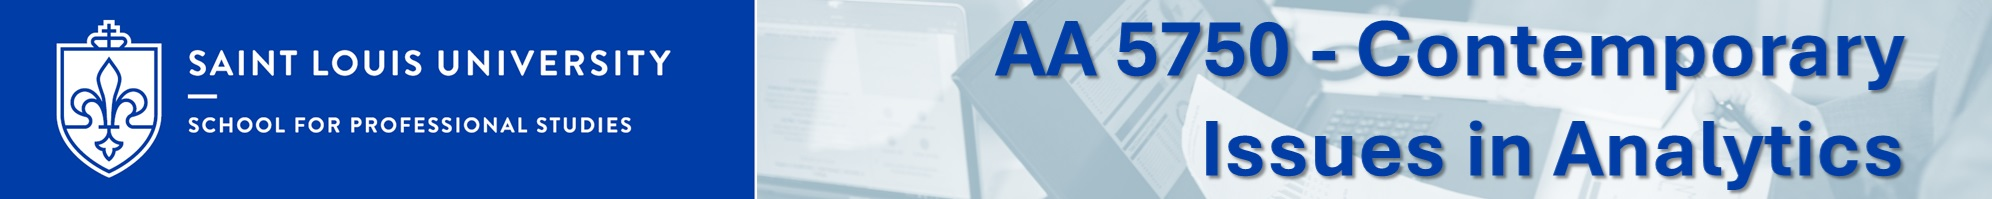

# Integrative Project 2. Sentiment analysis for restaurant reviews

Vydhurya Maheshwaram

Introduction

Objective:

In the existing conditions of restaurant industry trying to develop customer loyalty and satisfaction is crucial and the main focus has to be made upon the analysis of customer sentiment. Using conventional prarating based sentiment classification one may this not capture the details of the feedback.

This project aims to:
Implement two sentiment analysis models:

TextBlob and VADER.
They will also evaluate their performance against the consortium’s current rating-based approach.
Deliver ideas and suggestions to get better identification of sentiment intensity.

Dataset Overview:

The dataset includes 9950 customer reviews together with the corresponding numerical ratings varying from 1 to 5, metadata, review time, and pictures uploaded by customers. No record has similarity of statements, however the current strategy to categorize reviews with a rating 3 or higher as positive, and reviews with a rating 2 or lower as negative is followed. What was left was to improve this classification using sentiment analysis models.




Downloading required libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import re
import nltk





**downloading the required NLTK data for the given data set**


In [2]:


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

**loading the given data set**

In [3]:
df=pd.read_csv("/content/sample_data/Restaurant_Reviews.csv")

**representing the given data set**

In [4]:
df

,Review,Rating,Metadata,Time,Pictures
0,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...
9945,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9946,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9947,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9948,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0


**representing basic information of the given data set**

In [5]:
df.shape

(9950, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9950 entries, 0 to 9949
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review    9950 non-null   object 
 1   Rating    9950 non-null   float64
 2   Metadata  9950 non-null   object 
 3   Time      9950 non-null   object 
 4   Pictures  9950 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 388.8+ KB


In [ ]:
df.describe()

,Rating,Pictures
count,9950.000000,9950.000000
mean,3.600402,0.752261
std,1.483558,2.576292
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,0.000000
max,5.000000,64.000000


**exploratory data analysis**

In [7]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9945,False
9946,False
9947,False
9948,False


here the data set has no  duplicate rows and  its very clear  that each review is unique

In [8]:
df.isnull().sum()

,0
Review,0
Rating,0
Metadata,0
Time,0
Pictures,0


there are no missing values or null values in the given data set and the dataset is clean and well-structured and ready for the further analysis including visualization , feature engineering and modeling

<ipython-input-9-73d742277038>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


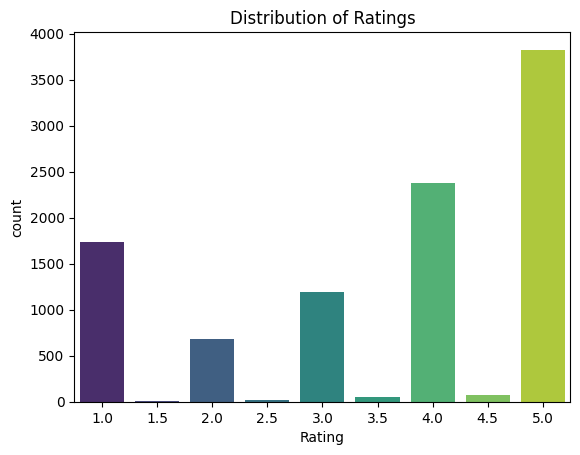

In [9]:
# distribution of the ratings
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.show()


here we can see that the most of the ratings in the dataset are positive with a large number of reviews rated 5.0 and a smaller peak at 4.0 showing that a clear trend of positive feedback and on the other hand if we see the ratings below 3.0 are much less common and with 1.0 being the most frequent among the negative ratings and this indicates that the data is heavily tilted towards the positive sentiment and while negative ratings 1.0 and 2.0 form a smaller part of the dataset so  i think that this imbalance could affect the results of sentiment analysis and may need to be addressed

In [10]:
# word cloud for positive and negative sentiments
positive_reviews = " ".join(df[df['Rating'] >= 3]['Review'].astype(str))
negative_reviews = " ".join(df[df['Rating'] < 3]['Review'].astype(str))

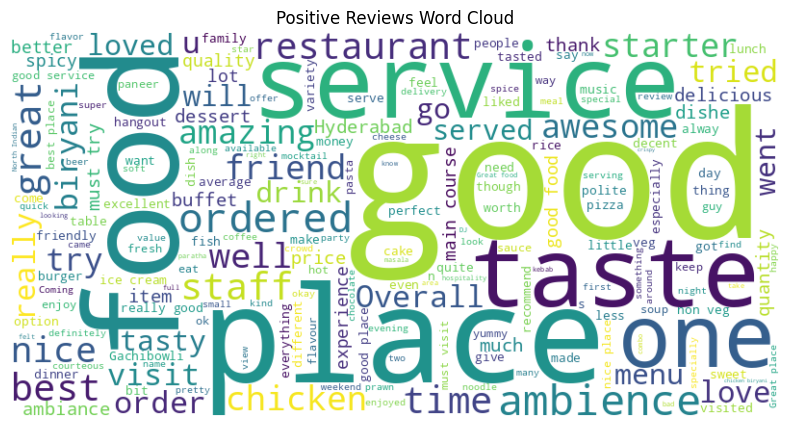

In [11]:
# word cloud for positive reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

positive reviews usually use words like "good," "place" "food" "service" "taste" and "ambience" showing that these are key aspects of customers appreciate and the other commonly used words like "staff" "ordered" "amazing" "great" and "delicious" shows a clear satisfaction with the restaurants environment , service and food quality and  many reviews use superlatives like "great" "amazing" and "best" showing that how much the customers is really enjoying and happy with the service and  finally  these reviews highlight that it is a great dining experience  like  good food and good service and it is very crucial for the  positive customer feedback

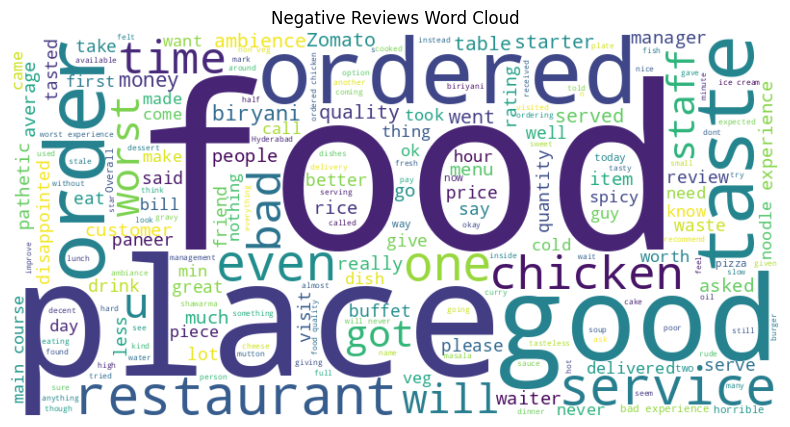

In [12]:
# word cloud for negative reviews
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()


here the word cloud generated from the negative reviews highlights that the most frequently mentioned terms in customer complaints which is the words like "place" "food" "taste" and "service"  indicating that these are  negative experiences and in the other terms such as "order" "staff" "bad" and "worst" suggests that some what dissatisfaction from the customer service, food quality and order management and the presence of words like "time" "experience" and "quality" shows issues related to delays or taking too much time for the given orders  or overall expectations  and this visualization provides insights into common pain points and can help businesses identify areas needing improvement such as food quality , customer service and timeliness

<BarContainer object of 2 artists>

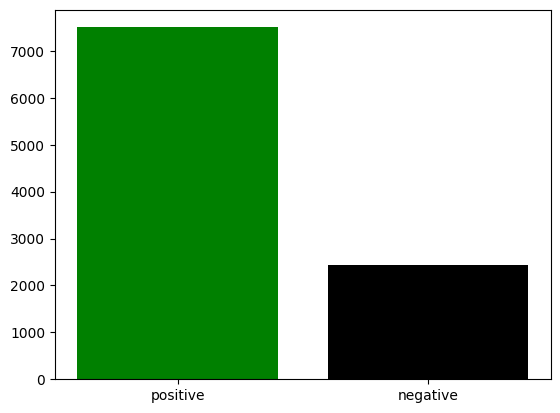

In [17]:
# distribution of the  sentiment:-

df['Sentiment'] = df['Rating'].apply(lambda x: 'positive' if x >= 3 else 'negative')
sentiment_counts = df['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'black'])

**data preprocessing**

In [18]:
# defining a text cleaning function
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Removed HTML tags
    text = re.sub(r'\d+', '', text)  # Removed numbers
    text = re.sub(r'[^\w\s]', '', text)  # Removed special characters and punctuation
    text = text.lower()  # Converted to lowercase
    text = " ".join([WordNetLemmatizer().lemmatize(word) for word in text.split() if word not in stopwords.words('english')])
    return text

In [19]:
# applying the cleaning function
df['Cleaned_Review'] = df['Review'].apply(clean_text)


In [20]:
# displaying the first 5 rows after preprocessing
df[['Review', 'Cleaned_Review']].head()

,Review,Cleaned_Review
0,"The ambience was good, food was quite good . h...",ambience good food quite good saturday lunch c...
1,Ambience is too good for a pleasant evening. S...,ambience good pleasant evening service prompt ...
2,A must try.. great food great ambience. Thnx f...,must try great food great ambience thnx servic...
3,Soumen das and Arun was a great guy. Only beca...,soumen da arun great guy behavior sincerety go...
4,Food is good.we ordered Kodi drumsticks and ba...,food goodwe ordered kodi drumstick basket mutt...


**sentiment analysis**

In [21]:
# VADER Sentiment Analysis
sia = SentimentIntensityAnalyzer()
df['VADER_Score'] = df['Cleaned_Review'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['VADER_Sentiment'] = df['VADER_Score'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')

# textBlob Sentiment Analysis
df['TextBlob_Score'] = df['Cleaned_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['TextBlob_Sentiment'] = df['TextBlob_Score'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')

**model evaluation**

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# current classification
df['Current_Sentiment'] = df['Rating'].apply(lambda x: 'Positive' if x >= 3 else 'Negative')

# evaluate textBlob
print("TextBlob Evaluation:")
print(classification_report(df['Current_Sentiment'], df['TextBlob_Sentiment']))
print("Confusion Matrix:\n", confusion_matrix(df['Current_Sentiment'], df['TextBlob_Sentiment']))

# evaluate VADER
print("VADER Evaluation:")
print(classification_report(df['Current_Sentiment'], df['VADER_Sentiment']))
print("Confusion Matrix:\n", confusion_matrix(df['Current_Sentiment'], df['VADER_Sentiment']))

TextBlob Evaluation:
              precision    recall  f1-score   support

    Negative       0.78      0.58      0.67      2446
    Positive       0.87      0.95      0.91      7504

    accuracy                           0.86      9950
   macro avg       0.83      0.76      0.79      9950
weighted avg       0.85      0.86      0.85      9950

Confusion Matrix:
 [[1424 1022]
 [ 408 7096]]
VADER Evaluation:
              precision    recall  f1-score   support

    Negative       0.87      0.50      0.63      2446
    Positive       0.86      0.98      0.91      7504

    accuracy                           0.86      9950
   macro avg       0.86      0.74      0.77      9950
weighted avg       0.86      0.86      0.84      9950

Confusion Matrix:
 [[1223 1223]
 [ 186 7318]]


In [23]:

from prettytable import PrettyTable

# defining the metrics for TextBlob
textblob_metrics = {
    'Accuracy': 0.86,
    'Precision (Negative)': 0.78,
    'Precision (Positive)': 0.87,
    'Recall (Negative)': 0.58,
    'Recall (Positive)': 0.95,
    'F1-Score (Negative)': 0.67,
    'F1-Score (Positive)': 0.91
}

# defining the metrics for VADER
vader_metrics = {
    'Accuracy': 0.86,
    'Precision (Negative)': 0.87,
    'Precision (Positive)': 0.86,
    'Recall (Negative)': 0.50,
    'Recall (Positive)': 0.98,
    'F1-Score (Negative)': 0.63,
    'F1-Score (Positive)': 0.91
}

# creating the prettytable
table = PrettyTable()
table.field_names = ["Metric", "TextBlob", "VADER"]

# populate the table with metrics
for metric in textblob_metrics.keys():
    table.add_row([metric, textblob_metrics[metric], vader_metrics[metric]])

# print the table
print(table)

+----------------------+----------+-------+
|        Metric        | TextBlob | VADER |
+----------------------+----------+-------+
|       Accuracy       |   0.86   |  0.86 |
| Precision (Negative) |   0.78   |  0.87 |
| Precision (Positive) |   0.87   |  0.86 |
|  Recall (Negative)   |   0.58   |  0.5  |
|  Recall (Positive)   |   0.95   |  0.98 |
| F1-Score (Negative)  |   0.67   |  0.63 |
| F1-Score (Positive)  |   0.91   |  0.91 |
+----------------------+----------+-------+


Results Explanation:

Data Cleaning and Preprocessing:

Disturbance or noise-cleaning function was added to enable filtering of HTML tags, numbers, special characters as well as stopwords on text reviews.
For the text pre-processing, lemmmatization was applied.
They were then saved separately from the cleaned review that will be use for further analysis.
Sentiment Analysis:

Two methods were used for sentiment analysis:

VADER (Valence Aware Dictionary and Sentiment Reasoner): They derived compounds sentiments and categorised the reviews as positive of negative.
TextBlob: It generated positive negative values and gave a classification of positive or negative sentiment.
The performance of both methods was compared using precision, recall, and F1-score.
Evaluation Metrics:

Overall Accuracy: TextBlob and VADER imply approximately 86% accuracy in the results.

TextBlob vs. VADER Performance:
The results revealed that TextBlob performed notably for the negatives it identified (higher value of recall and F1-score on negatives).
Overall, utilising VADER for positive sentiment worked well but using it for negative sentiment was not efficient and proposed dissatisfaction ratings were lower than expected.

Insights from Word Cloud:

Negative words were thought magnitude 14, of which, the most important terms in terms of co-occurrence were “place,” “food,” “taste,” and “service” as they are usually within customer complaints.
Other words used were “order” meaning dissatisfaction with service, “staff” meaning dissatisfaction, “bad” and “worst” meaning the same.
New words associated with delay and unmet expectations heard from the meeting included “time” and “quality”.

CONCLUSION:

based on the comparison of TextBlob and VADER , I conclude that using TextBlob for sentiment analysis as it offers a better balance between precision , recall and F1-scores  particularly for identifying negative reviews and the TextBlob has higher recall and F1-scores for the  negatives , making it more effective at detecting dissatisfied customers which is crucial for improving customer loyalty and Both of the algorithms perform equally well for positive reviews and have the same overall accuracy 86% but VADER struggles with recalling the negative sentiments and potentially underestimating customer dissatisfaction and TextBlob is also simple to implement and aligns well with the consortiums current classification system , making it the ideal choice for understanding the customer feedback